# BAR507 Excersize 2-1

## Myokyung Han(20224230)

## Data Loading 

In [1]:
import pandas as pd

In [2]:
df_samsung = pd.read_excel('./data/samsung_stock_price.xlsx', skiprows = 1)

In [3]:
df_samsung.head(5)

,날짜,종목코드,기업명,주가 2000-2022
0,2000-01-04T00:00:00,KRX:005930,삼성전자,6110
1,2000-01-05T00:00:00,KRX:005930,삼성전자,5580
2,2000-01-06T00:00:00,KRX:005930,삼성전자,5620
3,2000-01-07T00:00:00,KRX:005930,삼성전자,5540
4,2000-01-10T00:00:00,KRX:005930,삼성전자,5770


In [4]:
# 8byte to save the timestamp
df_samsung['날짜'] = pd.to_datetime(df_samsung['날짜'])

In [5]:
df_samsung.head(3)

,날짜,종목코드,기업명,주가 2000-2022
0,2000-01-04,KRX:005930,삼성전자,6110
1,2000-01-05,KRX:005930,삼성전자,5580
2,2000-01-06,KRX:005930,삼성전자,5620


In [6]:
# 시계열 분석을 위해 날짜 컬럼을 인덱스로 바꾸자 
df_samsung.set_index('날짜', inplace=True)
# df_samsung = df_samsung.set_index('날짜')

In [7]:
df_samsung.head()

,종목코드,기업명,주가 2000-2022
날짜,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620
2000-01-07,KRX:005930,삼성전자,5540
2000-01-10,KRX:005930,삼성전자,5770


In [8]:
# df_samsung.loc[0]
# 인덱스가 날짜로 바뀌었기 때문에 숫자를 넣으면 에러남 

In [9]:
df_samsung.loc['2020-01-10']

종목코드            KRX:005930
기업명                   삼성전자
주가 2000-2022         59500
Name: 2020-01-10 00:00:00, dtype: object

## Splicing the dataframe for a range of dates

In [10]:
df_samsung.loc['2010-03-01': '2010-03-10']
# missing dates 는 빼고 조회됨

,종목코드,기업명,주가 2000-2022
날짜,,,
2010-03-02,KRX:005930,삼성전자,15400
2010-03-03,KRX:005930,삼성전자,15420
2010-03-04,KRX:005930,삼성전자,15220
2010-03-05,KRX:005930,삼성전자,15500
2010-03-08,KRX:005930,삼성전자,15720
2010-03-09,KRX:005930,삼성전자,15720
2010-03-10,KRX:005930,삼성전자,15680


## Plot a time-series chart

In [11]:
import matplotlib.pyplot as plt

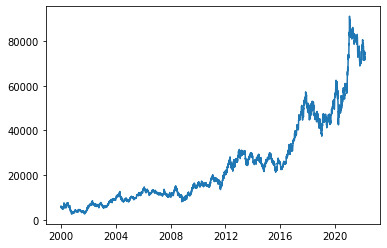

In [12]:
plt.plot(df_samsung['주가 2000-2022'])
plt.show()

## Japan imposed an export ban on June 30, 2019
### what would have happend on the stock price of the event?

In [13]:
df_sub = df_samsung.loc['2019-06-20': '2019-07-30']

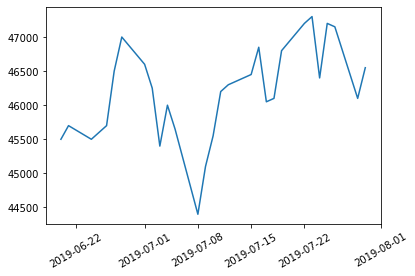

In [14]:
plt.plot(df_sub['주가 2000-2022'])
plt.xticks(rotation=30)
plt.show()

In [15]:
# df_sub.loc['2019-06-30']
# 해당 날짜에 데이터가 없어서 조회 시 에러남 

In [16]:
# 이벤트 발생 후 3일을 보여줌
# df_sub.loc['2019-06-30':].head(3)

In [17]:
# iloc : use integer number
event = df_sub.loc['2019-06-30':].iloc[0]

In [18]:
event

종목코드            KRX:005930
기업명                   삼성전자
주가 2000-2022         46600
Name: 2019-07-01 00:00:00, dtype: object

In [19]:
bbox = dict(boxstyle="round",  fc="0.8")

In [20]:
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

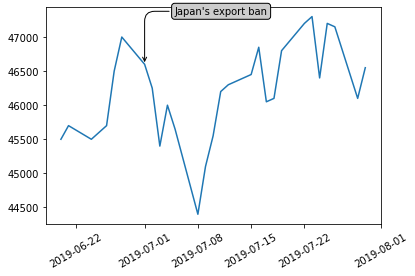

In [21]:
plt.plot(df_sub['주가 2000-2022'])
plt.xticks(rotation=30)
plt.annotate(
    "Japan's export ban", 
    xy = (event.name, event['주가 2000-2022']),
    xytext = (30,50),
    textcoords = 'offset points',
    arrowprops = arrowprops,
    bbox = bbox
    
)
plt.show()

#데이터를 볼때 앞뒤로 봐야 한다
# 생각보다 오래가지 않은것을 확인 할 수 있다 

In [22]:
event['주가 2000-2022']

46600

In [23]:
event.index

Index(['종목코드', '기업명', '주가 2000-2022'], dtype='object')

## Merge Samsung and LG stock price together

In [24]:
df_lg = pd.read_excel('./data/lg_stock_price.xlsx', skiprows = 1)

In [25]:
df_lg['날짜'] = pd.to_datetime(df_lg['날짜'])

In [26]:
df_lg.set_index('날짜', inplace=True)

In [27]:
df_lg.head()

,종목코드,기업명,주가 2000-2022
날짜,,,
2002-04-22,KRX:066570,LG전자,62936
2002-04-23,KRX:066570,LG전자,57463
2002-04-24,KRX:066570,LG전자,55704
2002-04-25,KRX:066570,LG전자,51209
2002-04-26,KRX:066570,LG전자,53554


In [28]:
df_test = pd.concat([df_lg, df_lg])

In [29]:
df_test.loc['2019-07-01']
# 인덱스 중복이 됩니다. 

,종목코드,기업명,주가 2000-2022
날짜,,,
2019-07-01,KRX:066570,LG전자,76700
2019-07-01,KRX:066570,LG전자,76700


In [30]:
df_test.set_index(['종목코드', '기업명'])
# .loc 두번으로 접근 

주가 2000-2022
종목코드       기업명               
KRX:066570 LG전자         62936
           LG전자         57463
           LG전자         55704
           LG전자         51209
           LG전자         53554
...                       ...
           LG전자        124000
           LG전자        124000
           LG전자        123500
           LG전자        124000
           LG전자        127000

[9824 rows x 1 columns]

In [31]:
df_samsung.head(3)

,종목코드,기업명,주가 2000-2022
날짜,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620


In [32]:
df_lg.head(3)

,종목코드,기업명,주가 2000-2022
날짜,,,
2002-04-22,KRX:066570,LG전자,62936
2002-04-23,KRX:066570,LG전자,57463
2002-04-24,KRX:066570,LG전자,55704


## Rename Columns

In [33]:
df_samsung = df_samsung.rename(
    columns = {'주가 2000-2022':'samsung'}
)

In [34]:
df_samsung[['samsung']]

,samsung
날짜,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770
...,...
2022-02-24,71500
2022-02-25,71900
2022-02-28,72100


In [35]:
df_samsung = df_samsung['samsung'].to_frame()

In [36]:
df_samsung.head()

,samsung
날짜,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770


In [37]:
df_lg = df_lg.rename(
    columns = {'주가 2000-2022':'lg'}
)

In [38]:
df_lg = df_lg['lg'].to_frame()

In [39]:
df_lg.head()

,lg
날짜,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704
2002-04-25,51209
2002-04-26,53554


### Merge the two dataframes

NaN = Not a Number 

### Merge/join method
* inner join (intersection)
* left join (default)
* right join
* outer join (union)

In [40]:
df_samsung.join(df_lg)

,samsung,lg
날짜,,
2000-01-04,6110,NaN
2000-01-05,5580,NaN
2000-01-06,5620,NaN
2000-01-07,5540,NaN
2000-01-10,5770,NaN
...,...,...
2022-02-24,71500,124000.0
2022-02-25,71900,124000.0
2022-02-28,72100,123500.0


In [41]:
# index를 활용해서 조인하는 방법
# 기본이 left join이므로 반대로 join할 시 2022-04-22 부터 조회됨
df_merged = df_samsung.join(df_lg)

In [42]:
df_lg.join( df_samsung)

,lg,samsung
날짜,,
2002-04-22,62936,8200
2002-04-23,57463,8540
2002-04-24,55704,8640
2002-04-25,51209,8260
2002-04-26,53554,8000
...,...,...
2022-02-24,124000,71500
2022-02-25,124000,71900
2022-02-28,123500,72100


### Drop null values

In [43]:
df_merged = df_merged.dropna()

In [44]:
df_merged

,samsung,lg
날짜,,
2002-04-22,8200,62936.0
2002-04-23,8540,57463.0
2002-04-24,8640,55704.0
2002-04-25,8260,51209.0
2002-04-26,8000,53554.0
...,...,...
2022-02-24,71500,124000.0
2022-02-25,71900,124000.0
2022-02-28,72100,123500.0


### Plot a time-series chart

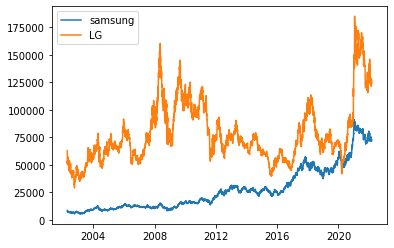

In [45]:
plt.plot(df_merged['samsung'], label='samsung')
plt.plot(df_merged['lg'], label = 'LG')
plt.legend()
plt.show()

In [46]:
init_prices = df_merged.iloc[0]

In [48]:
df_merged['samsung_norm']\
=df_merged['samsung']/init_prices.samsung*100

In [49]:
df_merged['lg_norm']\
=df_merged['lg']/init_prices.lg*100

In [50]:
df_merged.head()

,samsung,lg,samsung_norm,lg_norm
날짜,,,,
2002-04-22,8200,62936.0,100.000000,100.000000
2002-04-23,8540,57463.0,104.146341,91.303864
2002-04-24,8640,55704.0,105.365854,88.508961
2002-04-25,8260,51209.0,100.731707,81.366785
2002-04-26,8000,53554.0,97.560976,85.092793


In [51]:
df_merged.tail(3)

,samsung,lg,samsung_norm,lg_norm
날짜,,,,
2022-02-28,72100,123500.0,879.268293,196.231092
2022-03-02,72000,124000.0,878.048780,197.025550
2022-03-03,72800,127000.0,887.804878,201.792297


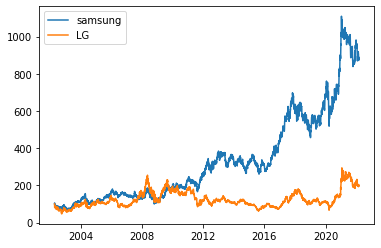

In [52]:
plt.plot(df_merged['samsung_norm'], label='samsung')
plt.plot(df_merged['lg_norm'], label = 'LG')
plt.legend()
plt.show()
# 정규화가 필요한 이유